In [ ]:
from huggingface_hub import HfApi
api = HfApi()


In [ ]:
datasets = api.list_datasets(filter="task_categories:image-classification", search="imagenet")


In [ ]:
for d in datasets:
    print(d)

In [1]:
from datasets import load_dataset, Image, DatasetDict

dataset = load_dataset("frgfm/imagenette", '320px')

In [2]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 9469
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 3925
    })
})

In [3]:
def add_image_filename(examples):
    image_paths = [img["path"] for img in examples["image"]]
    examples["image_filename"] = image_paths
    return examples

In [6]:

updated_dataset = DatasetDict()
for split in dataset.keys():
    print(f"Processing {split} split...")

    split_dataset = dataset[split]


    # Get the file path of the PIL image
    split_dataset = split_dataset.cast_column("image", Image(decode=False))
    split_dataset = split_dataset.map(add_image_filename, batched=True)
    updated_split = split_dataset.cast_column("image", Image(decode=True))

    # Rearrange feature columns
    updated_split = updated_split.select_columns(["image_filename", "image", "label"])

    updated_dataset[split] = updated_split

Processing train split...
Processing validation split...


Map:   0%|          | 0/3925 [00:00<?, ? examples/s]

In [7]:
updated_dataset

DatasetDict({
    train: Dataset({
        features: ['image_filename', 'image', 'label'],
        num_rows: 9469
    })
    validation: Dataset({
        features: ['image_filename', 'image', 'label'],
        num_rows: 3925
    })
})

In [8]:
updated_dataset['train'][0]

{'image_filename': 'n02979186_5856.JPEG',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=569x320>,
 'label': 2}

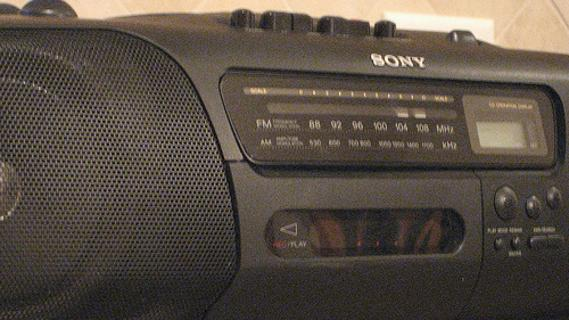

In [9]:
updated_dataset['train'][0]['image']

In [11]:
import os
from PIL import Image

folder_name = "local_images"
os.makedirs(folder_name, exist_ok=True)

for split in updated_dataset.keys():
    print(f"Saving {split} split images...")

    split_dataset = updated_dataset[split]

    for item in split_dataset:
        image = item["image"]
        image_filename = item["image_filename"]

        save_path = os.path.join(folder_name, image_filename)

        image.save(save_path)

        print(f"{image_filename}")

Saving train split images...
n02979186_5856.JPEG
ILSVRC2012_val_00002034.JPEG
n02979186_24084.JPEG
n02979186_184.JPEG
n02979186_2385.JPEG
n02979186_16819.JPEG
n02979186_18554.JPEG
n02979186_10758.JPEG
n02979186_18368.JPEG
n02979186_12948.JPEG
n02979186_10975.JPEG
n02979186_5944.JPEG
n02979186_27539.JPEG
n02979186_9567.JPEG
n02979186_9137.JPEG
n02979186_5544.JPEG
n02979186_14536.JPEG
ILSVRC2012_val_00033397.JPEG
n02979186_15777.JPEG
n02979186_12118.JPEG
n02979186_2147.JPEG
n02979186_5378.JPEG
n02979186_3306.JPEG
n02979186_18283.JPEG
n02979186_10349.JPEG
n02979186_9863.JPEG
n02979186_2686.JPEG
n02979186_22845.JPEG
n02979186_3994.JPEG
n02979186_18057.JPEG
n02979186_3428.JPEG
n02979186_25396.JPEG
n02979186_11299.JPEG
n02979186_15409.JPEG
n02979186_12266.JPEG
n02979186_13027.JPEG
n02979186_7257.JPEG
n02979186_254.JPEG
n02979186_27597.JPEG
n02979186_12564.JPEG
n02979186_1897.JPEG
n02979186_5138.JPEG
n02979186_21438.JPEG
n02979186_2887.JPEG
n02979186_10365.JPEG
n02979186_15188.JPEG
n02979186_

In [12]:
# compress the folder into a tar
import shutil

shutil.make_archive(folder_name, 'tar', folder_name)


'/home/dnth/Desktop/vl-hf-workflow/notebooks/local_images.tar'